# Basic Charting Operations

In [206]:
%matplotlib notebook

In [207]:
import matplotlib as mpl

In [208]:
mpl.get_backend()

'nbAgg'

In [209]:
import matplotlib.pyplot as plt

In [210]:
# helper that gives you details about plot function
plt.plot?

<IPython.core.display.Javascript object>


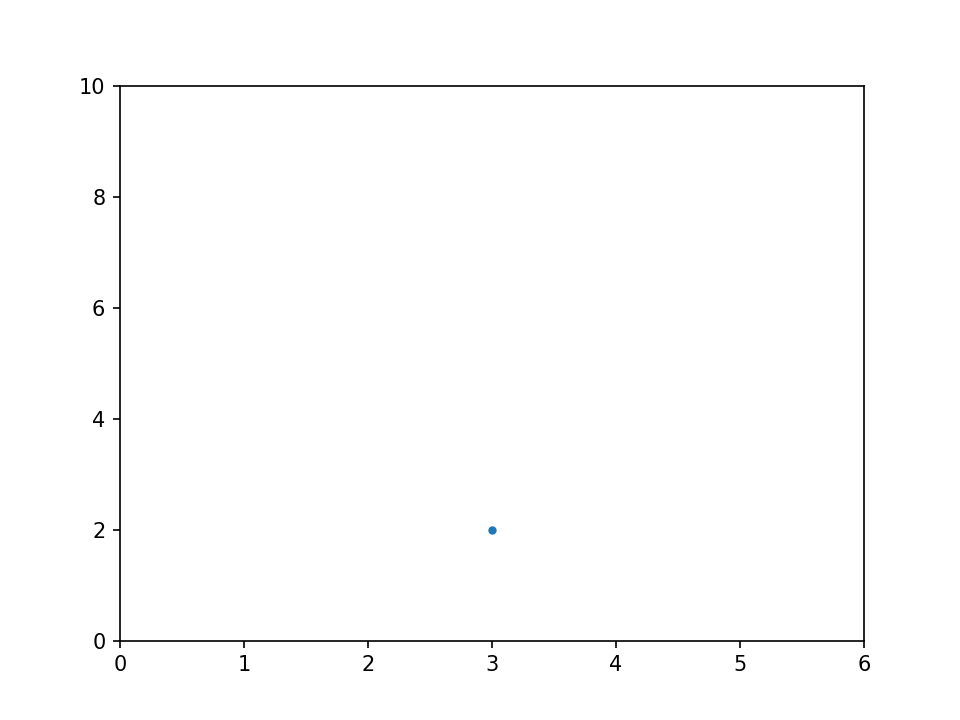

In [211]:
# plotting single point
plt.plot(3,2,'.')

<IPython.core.display.Javascript object>


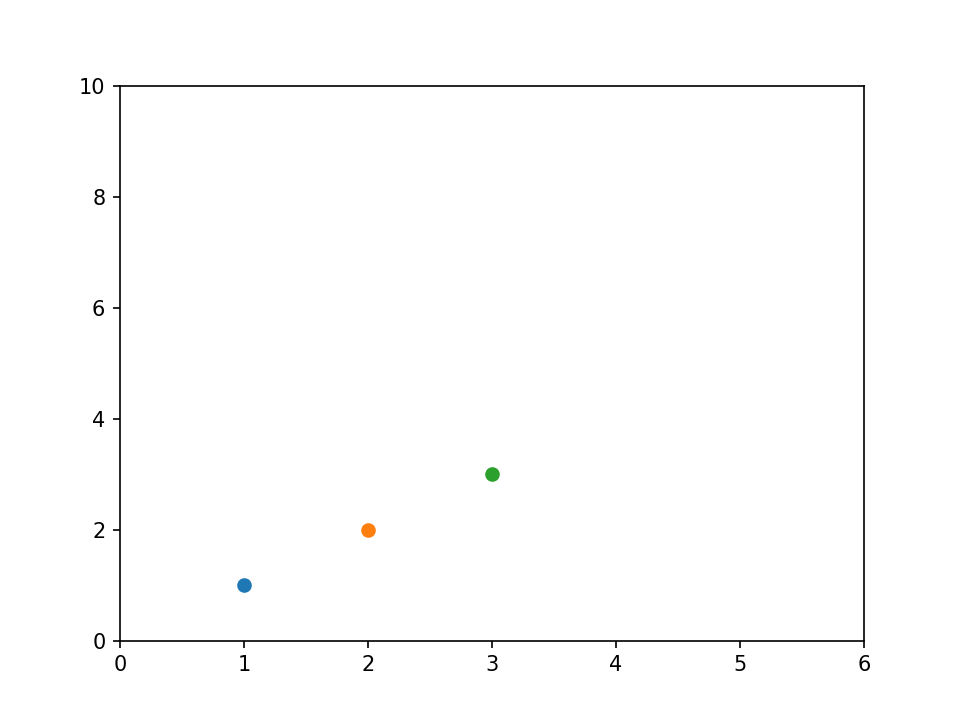

In [24]:
# plotting multiple points
plt.figure()
plt.plot(1,1,'o')
plt.plot(2,2,'o')
plt.plot(3,3,'o')

In [212]:
# Get the current axis and change the x and y ranges
ax = plt.gca()
ax.axis([0,6,0,10])

[0, 6, 0, 10]

In [213]:
# Get all child objects associated with axis object
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

# Scatterplots

<IPython.core.display.Javascript object>


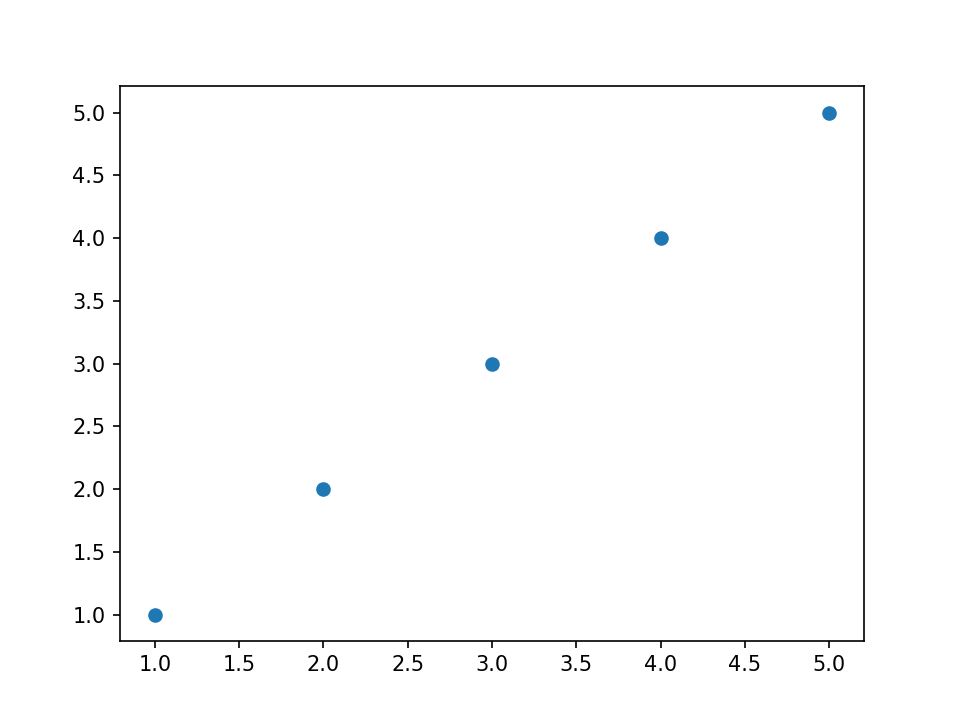

In [214]:
# Scatter plot using numpy arrays
import numpy as np
x = np.array([1,2,3,4,5])
y = x
plt.figure()
plt.scatter(x,y)

In [37]:
# Adding colors (c) and changing size (s)
colors = ["green"]*(len(x)-1)
colors.append("red")
plt.scatter(x,y,s=100,c=colors)

In [215]:
# Using zip function to convert 2 list into list of tuples
zip_generator = zip([1,2,3,4],[5,6,7,8])
print(list(zip_generator))

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [216]:
# Unzip and convert them to list again
zip_generator = zip([1,2,3,4],[5,6,7,8])
p,q = zip(*zip_generator)
print(p)
print(q)

(1, 2, 3, 4)
(5, 6, 7, 8)


<IPython.core.display.Javascript object>


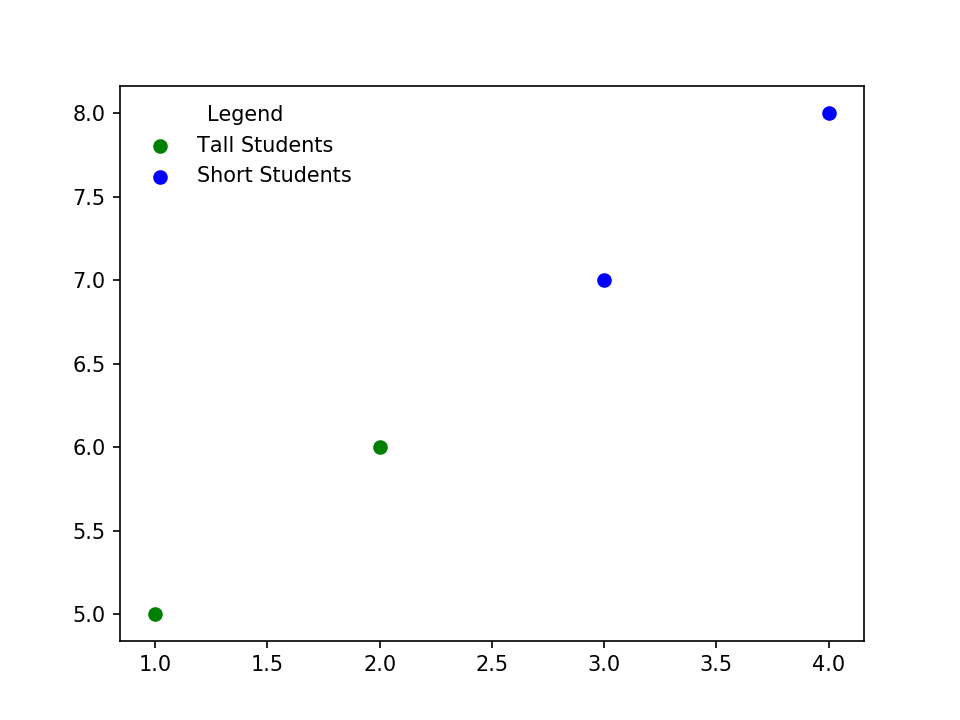

In [217]:
# Plotting by sclicing the list
plt.figure()
plt.scatter(p[:2],q[:2],color='green',label="Tall Students")
plt.scatter(p[2:],q[2:],color='blue',label="Short Students")

In [56]:
# Adding properties to plot
plt.xlabel("No of students")
plt.ylabel("No of marks")
plt.title("Relation btwn students and marks")

# Drawing a legend
plt.legend()

In [218]:
# Customizing legend
# loc values : 1 (top left) 2(top right) 3 (bottom left) 4 (bottom right)
plt.legend(loc = 2, frameon = False, title="Legend")
legend = plt.gca().get_children()[-2]

In [219]:
# Getting all children of Artist Object

from matplotlib.artist import Artist

def get_rec(art, depth = 0):
    if isinstance(art,Artist):
        print(" " *depth + str(art))
        for child in art.get_children():
            get_rec(child, depth+2) 
            
get_rec(legend)

Legend
      Text(0, 0, 'Legend')
            Text(0, 0, 'Tall Students')
            Text(0, 0, 'Short Students')
  FancyBboxPatch((130.417, 525.683), width=229.75, height=97.5)


# Line Charts

<IPython.core.display.Javascript object>


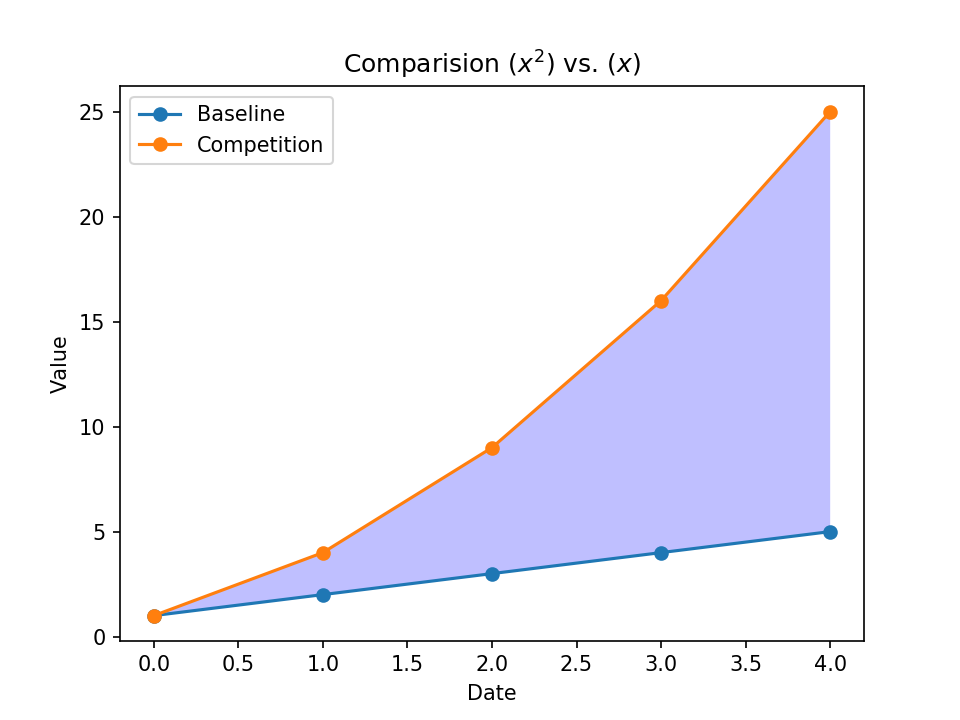

In [220]:
linear_data = np.array([1,2,3,4,5])
quadratic_data = linear_data ** 2
plt.figure()
plt.plot(linear_data,'-o',quadratic_data,'-o')

In [121]:
# Adding Dashed Line (Example of String formatting)
plt.plot([22,40,51], '--r')

In [221]:
# Setting Legend 
plt.legend(['Baseline','Competition','Us'])

In [222]:
# Fill between 
plt.gca().fill_between(range(len(linear_data)),
                 linear_data,
                 quadratic_data,
                 facecolor='blue',
                 alpha = 0.25)

In [223]:
# Set axis properties
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Value")

# Using the inbuild LateX support
ax.set_title("Comparision ($x^2$) vs. ($x$)")

Text(0.5, 1.0, 'Comparision ($x^2$) vs. ($x$)')

<IPython.core.display.Javascript object>


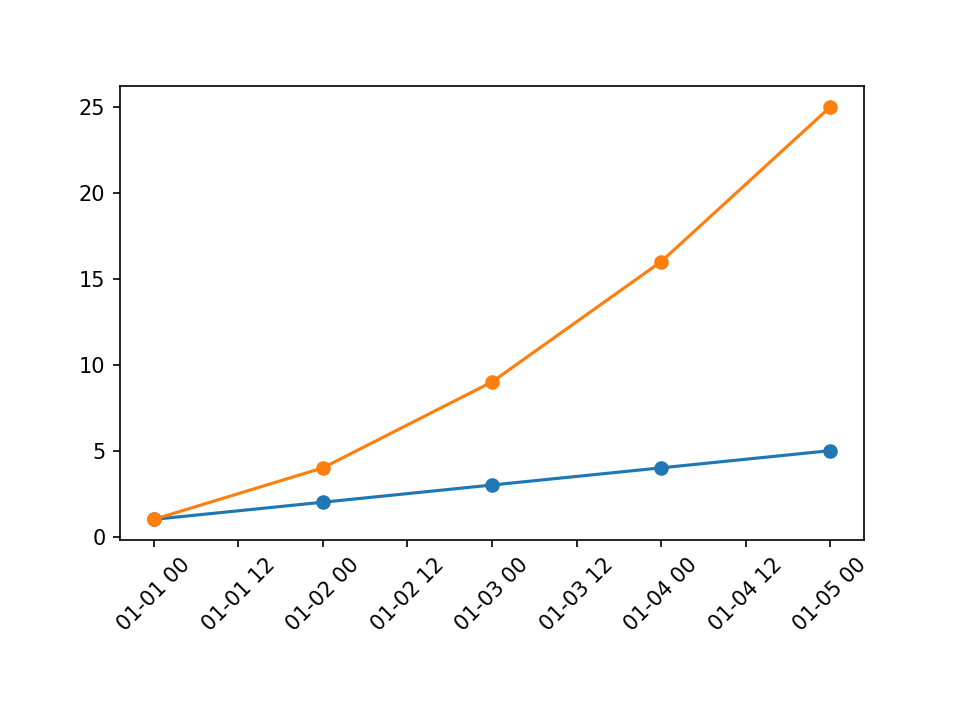

In [232]:
# Set Date on x axis with pandas support
import pandas as pd
plt.figure()
conversation_dates = np.arange('2017-01-01','2017-01-06',dtype='datetime64')
conversation_dates = list(map(pd.to_datetime, conversation_dates))
plt.plot(conversation_dates,linear_data,'-o',conversation_dates,quadratic_data,'-o')

In [233]:
# Set rotation to it
x = plt.gca().xaxis;

for item in x.get_ticklabels():
    item.set_rotation(45)
    
#Add space at bottom
plt.subplots_adjust(bottom = 0.25)

# Bar Charts

<IPython.core.display.Javascript object>


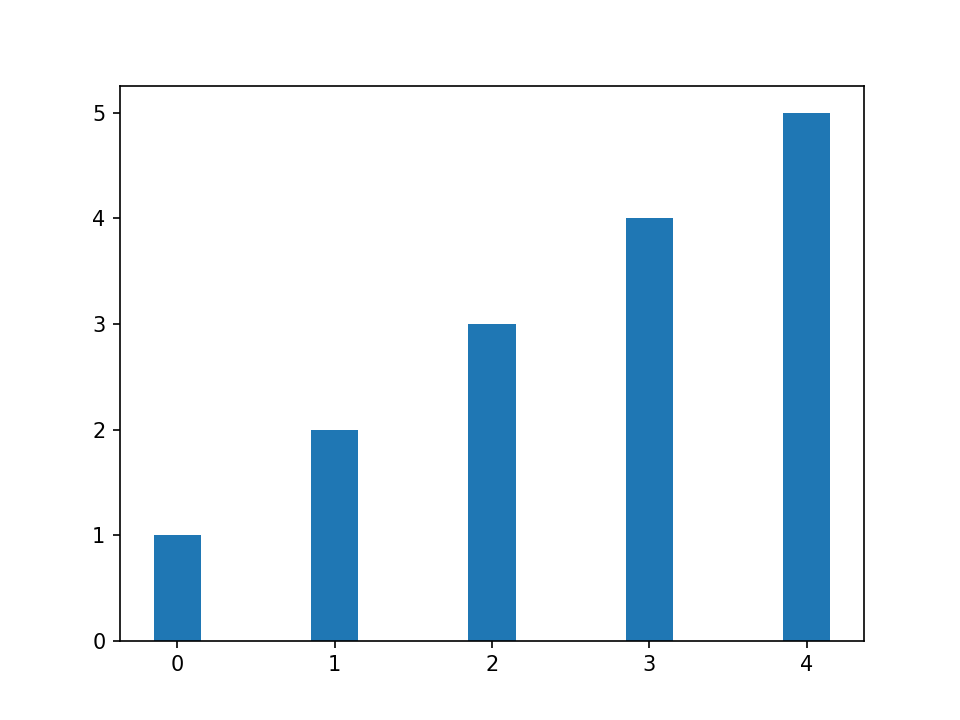

<BarContainer object of 5 artists>

In [225]:
# Plotting simple bar chart
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals,linear_data,width = 0.3)

In [188]:
# Adding one bar chart to existing 
new_xvals = []
for item in xvals:
    new_xvals.append(item + 0.3)

plt.bar(new_xvals,quadratic_data,color='r',width=0.3)

<BarContainer object of 5 artists>

<IPython.core.display.Javascript object>


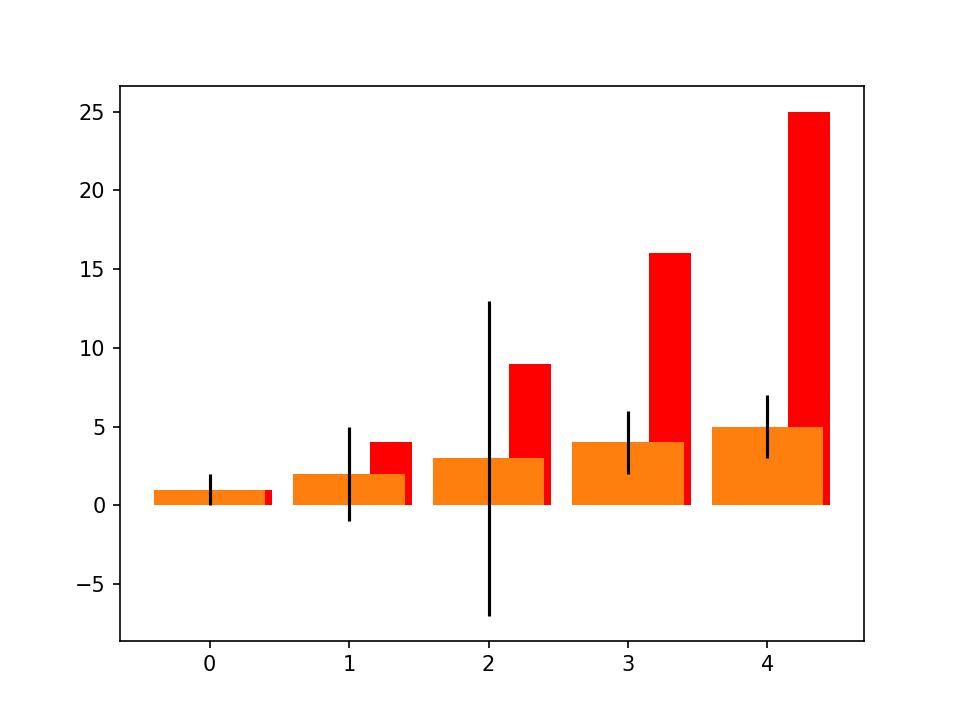

<BarContainer object of 5 artists>

In [226]:
# Adding error to existing bar chart
from random import randint
plt.figure()

plt.bar(xvals,linear_data,width = 0.3)
plt.bar(new_xvals,quadratic_data,color='r',width=0.3)
linear_err = [randint(0,15) for x in range(len(linear_data))]
plt.bar(xvals,linear_data,yerr=linear_err)

<IPython.core.display.Javascript object>


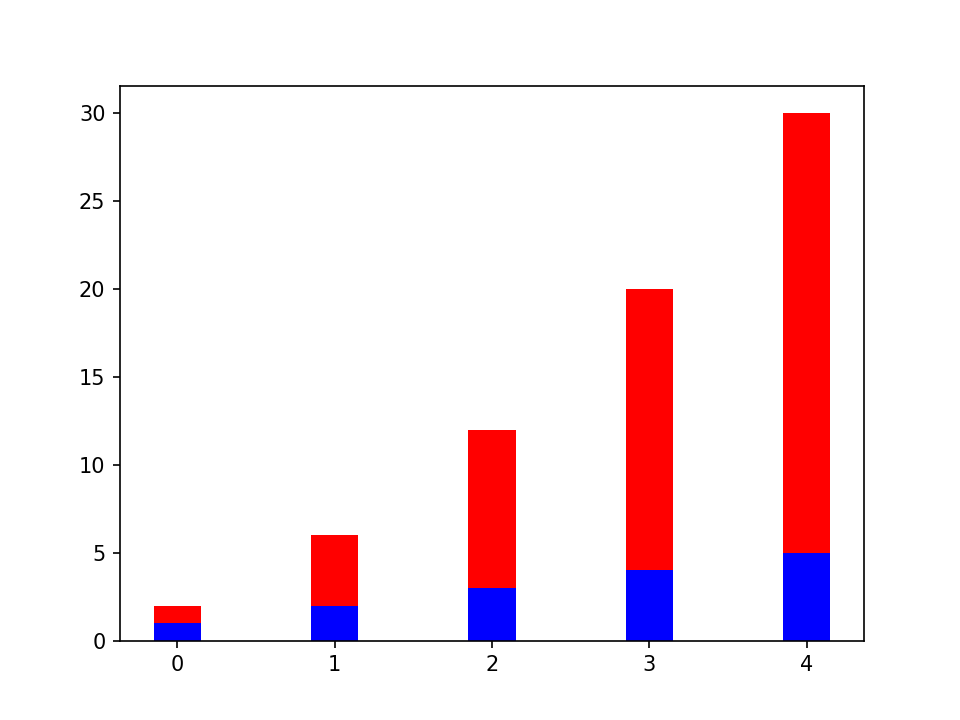

<BarContainer object of 5 artists>

In [191]:
# Stacking of bar vertically
plt.figure()

plt.bar(xvals,linear_data,width = 0.3,color='b')
plt.bar(xvals,quadratic_data,width=0.3,bottom=linear_data,color='r')

<IPython.core.display.Javascript object>


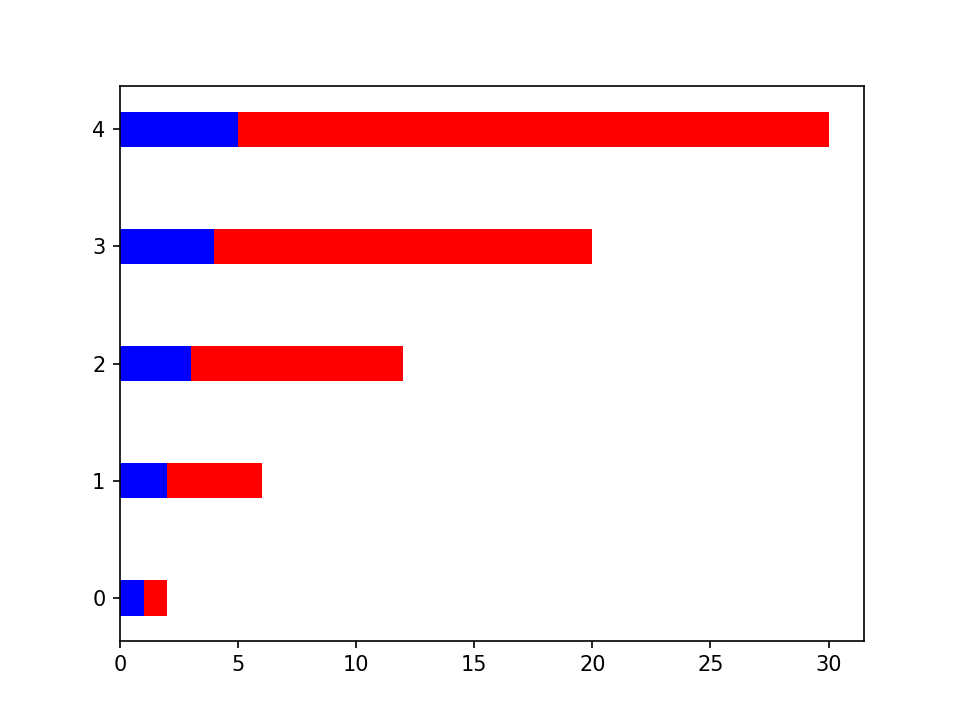

<BarContainer object of 5 artists>

In [234]:
# Stacking of bar horizontally
plt.figure()

plt.barh(xvals,linear_data,height = 0.3,color='b')
plt.barh(xvals,quadratic_data,height = 0.3,left=linear_data,color='r')

<IPython.core.display.Javascript object>


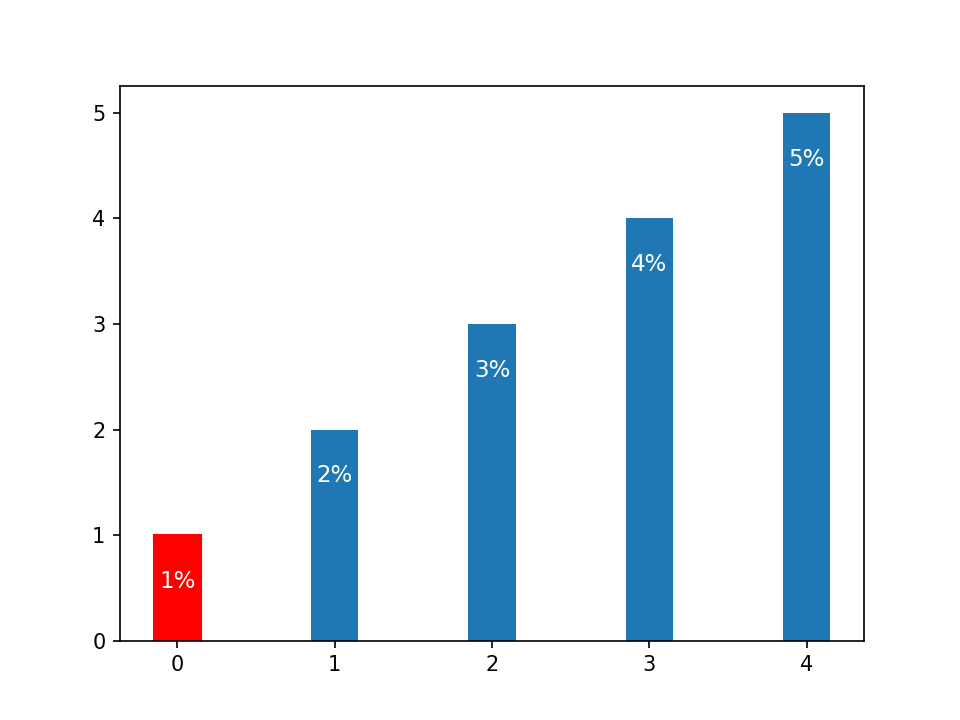

In [204]:
# Change the color of single bar
plt.figure()
bars = plt.bar(xvals,linear_data,width = 0.3)
bars[0].set_color('r')

In [228]:
# Removing Frame 
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [229]:
# Place values at individual bar
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)